In [93]:
import pandas as pd
import numpy as np
import os
import numpy
import matplotlib.pyplot as plt
import SimpleITK
import itertools

from pathlib import Path

In [2]:
data1 = Path(os.getcwd()) / 'data' 

In [21]:
def sitk_show(img, title=None, margin=0.0, dpi=40):
    nda = SimpleITK.GetArrayFromImage(img)
#     nda=numpy.transpose(nda)
#     print(nda.shape)
    #spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    #extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    extent = (0, nda.shape[1], nda.shape[0], 0)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [138]:
def get_images_lists_from_path(my_path, idxslice=105, remove_first=2):
    """[summary]

    Args:
        my_path (str): Path of the major folder containing the subfolders (HGG in our case)
        idxslice (int): Time of the image to select, 
                        105 should be the max extension of the registration by the machine so is good
        remove_first (int): Initial files to remove, I had to do it for example because 
                            I had .DS_Store files
    """
    dirs = []
    files =  []
    for dirname, _, filenames in os.walk(my_path):
        dirs.append(dirname)
        files.append(filenames)

    dirs = dirs[remove_first:]
    files = files[remove_first:]

    tot_files = []
    c=0
    for dir in dirs:
        for fil in files[c]:
            tot_files.append(str(dir) + '/' + str(fil))
        c+=1

    t2 = []
    t1ce = []
    t1 = []
    flair = []
    seg = []

    for file in tot_files:
        img = SimpleITK.ReadImage(file)
        arr = SimpleITK.GetArrayFromImage(img[:, :, idxslice])
        if 't2' in str(file):
            t2.append(arr)
        elif 't1ce' in str(file):
            t1ce.append(arr)
        elif 't1' in str(file):
            t1.append(arr)
        elif 'flair' in str(file):
            flair.append(arr)
        elif 'seg' in str(file):
            seg.append(arr)
    return t2, t1ce, t1, flair, seg

In [139]:
t2, t1ce, t1, flair, seg = get_images_lists_from_path(data1)

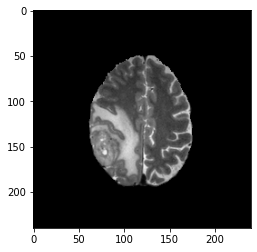

In [147]:
plt.imshow(t2[0])

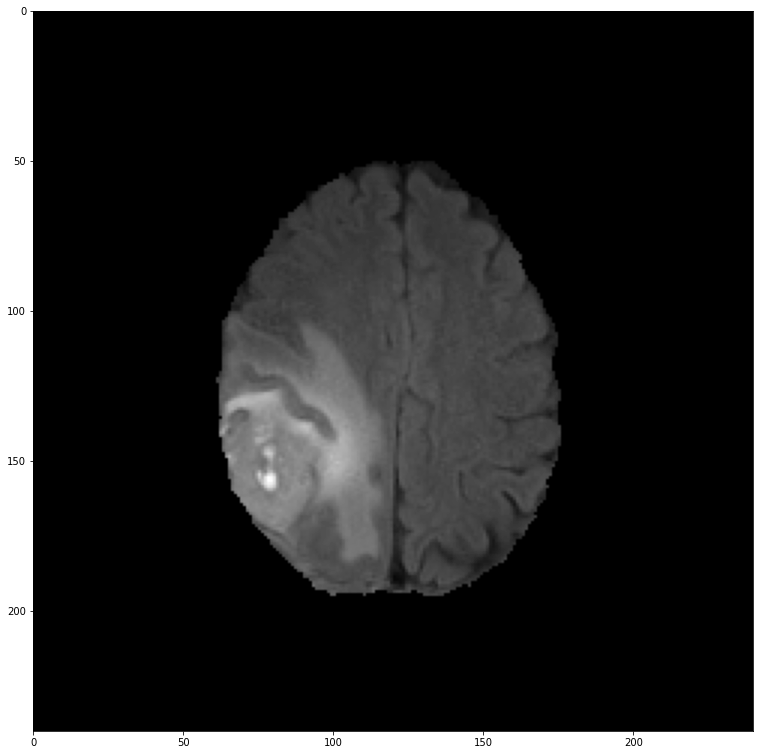

In [69]:
sitk_show(flair[:, :, idxslice])

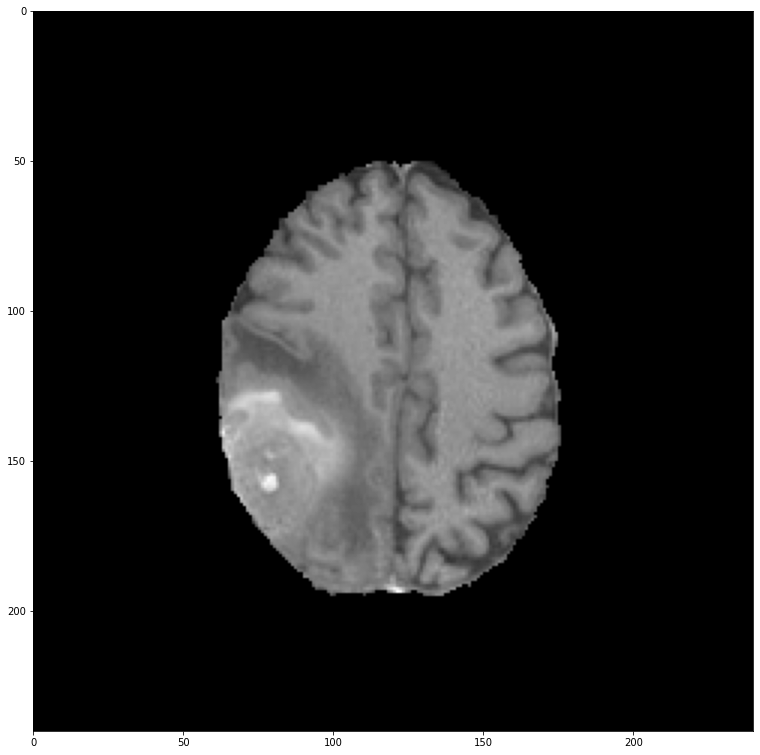

In [70]:
sitk_show(T1[:, :, idxslice])

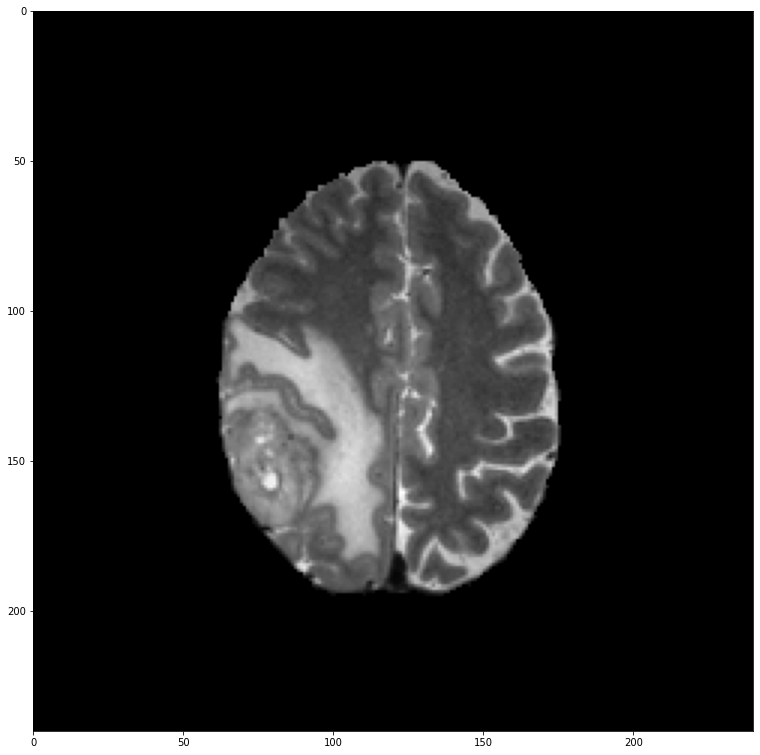

In [71]:
sitk_show(T2[:, :, idxslice])

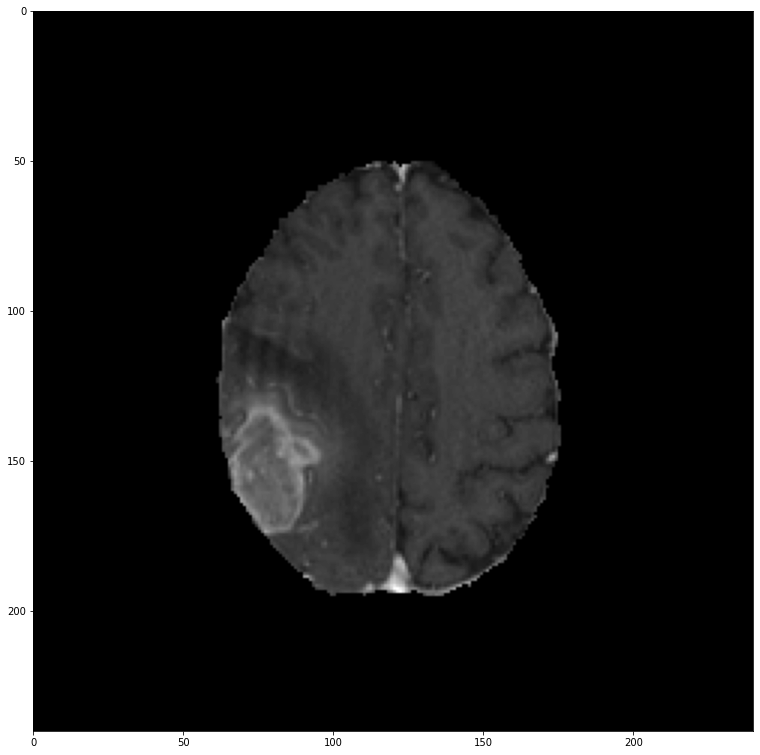

In [72]:
sitk_show(tice[:, :, idxslice])

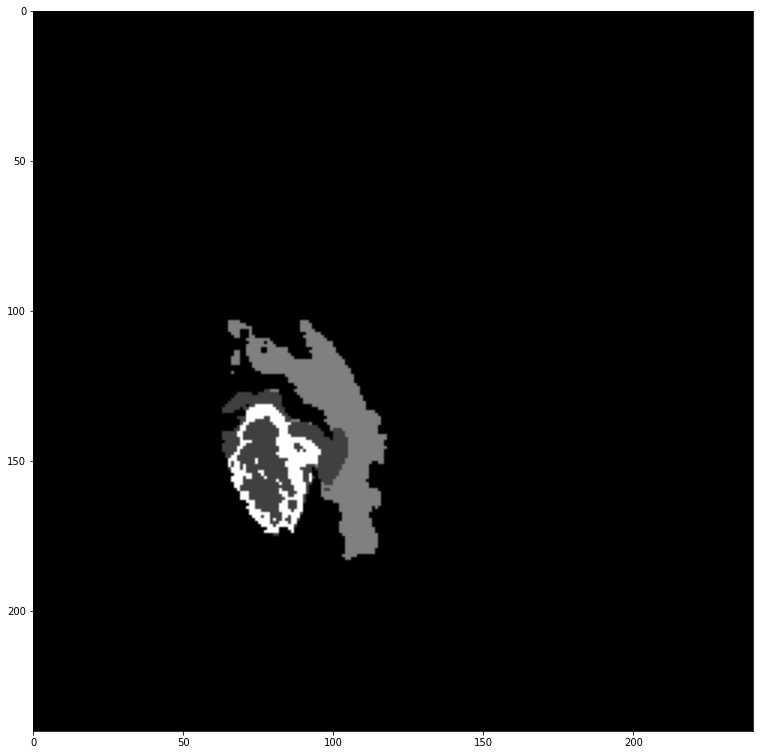

In [73]:
sitk_show(lab[:, :, idxslice])

In [74]:
nda = SimpleITK.GetArrayFromImage(flair[:, :, idxslice])
nda

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

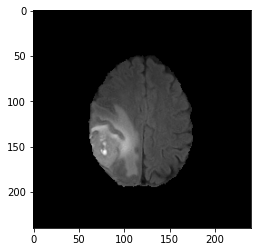

In [75]:
plt.imshow(nda)